In [5]:
import os
import os.path as op
import matplotlib.pyplot as plt
import mne

In [7]:
"""从文件中读取诱发数据集"""
# 这边的数据是从网上下载的，
data_path = mne.datasets.sample.data_path()
fname = op.join(data_path, 'MEG', 'sample', 'sample_audvis-ave.fif')
evokeds = mne.read_evokeds(fname, baseline=(None, 0), proj=True)
print(evokeds)

Using default location ~/mne_data for sample...
Creating ~/mne_data
[............................................................] 100.00% ( 1.54 GB,   3.4 MB/s) /-
Verifying hash fc2d5b9eb0a144b1d6ba84dc3b983602.
Decompressing the archive: C:\Users\zx305\mne_data\MNE-sample-data-processed.tar.gz
(please be patient, this can take some time)
Successfully extracted to: ['C:\\Users\\zx305\\mne_data\\MNE-sample-data']
Attempting to create new mne-python configuration file:
C:\Users\zx305\.mne\mne-python.json
Reading C:\Users\zx305\mne_data\MNE-sample-data\MEG\sample\sample_audvis-ave.fif ...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
        Average EEG reference (1 x 60) active
    Found the data of interest:
        t =    -199.80 ...     499.49 ms (Left Auditory)
        0 CTF compensation matrices available
        nave = 55 - aspect type = 100
Projections have already been applied. Setting pro

In [8]:
# 使用read_evokeds函数加载诱发文件，并返回evoked实例列表，可以使用condition参数来读取指定类别

# 这里有['Left Auditory', 'Right Auditory', 'Left Visual', 'Right Visual']等类别，


evoked = mne.read_evokeds(fname, condition='Left Auditory') #左边听觉
evoked.apply_baseline((None, 0)).apply_proj()

print(evoked)

Reading C:\Users\zx305\mne_data\MNE-sample-data\MEG\sample\sample_audvis-ave.fif ...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
        Average EEG reference (1 x 60) active
    Found the data of interest:
        t =    -199.80 ...     499.49 ms (Left Auditory)
        0 CTF compensation matrices available
        nave = 55 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
Applying baseline correction (mode: mean)
Projections have already been applied. Setting proj attribute to True.
<Evoked  |  'Left Auditory' (average, N=55), [-0.1998, 0.49949] sec, 376 ch, ~4.8 MB>


In [9]:
# 打印evoked的信息，这个信息和Raw对象以及Epochs对象中的info很相似
print(evoked.info)
print(evoked.times)

<Info | 20 non-empty fields
    bads : list | MEG 2443, EEG 053
    ch_names : list | MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, ...
    chs : list | 376 items (GRAD: 204, MAG: 102, STIM: 9, EEG: 60, EOG: 1)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    dig : Digitization | 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
    events : list | 0 items
    file_id : dict | 4 items
    highpass : float | 0.10000000149011612 Hz
    hpi_meas : list | 1 items
    hpi_results : list | 1 items
    lowpass : float | 40.0 Hz
    maxshield : bool | False
    meas_date : tuple | 2002-12-03 19:01:10 GMT
    meas_id : dict | 4 items
    nchan : int | 376
    proc_history : list | 0 items
    projs : list | PCA-v1: on, PCA-v2: on, PCA-v3: on, ...
    sfreq : float | 600.614990234375 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    device_info : NoneType


In [14]:
# 查看evoked结构其他属性
print(evoked.nave)
  # Number of averaged epochs.print(evoked.first)
  # First time sample.print(evoked.last)
  # Last time sample.print(evoked.comment)
  # Comment on dataset. Usually the condition.print(evoked.kind)
  # Type of data, either average or standard_error.55

55


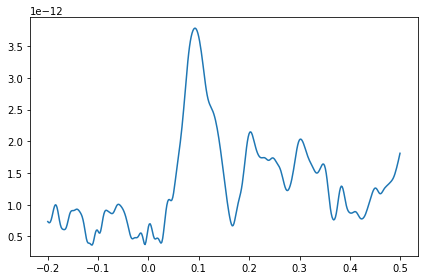

In [22]:
# 快速提取并绘制全局能量谱(Global Field Power, GFP)作为跨通道的标准偏差

# 这里仅对EEG显示


gfp = evoked.copy().pick_types(eeg=True, meg=False).data.std(axis=0)
# gfp = evoked.copy().pick_types(eeg=True, meg=True).data.std(axis=0)
fig, ax = plt.subplots(1)

ax.plot(evoked.times, gfp / 1e6)

# scale to uVax.set(xlabel='Time (sec)', ylabel='GFP (uV)')
fig.tight_layout()

# 对齐即可

In [38]:
# a. 读取evoked文件，创建evoked对象
# sample_audvis-ave.fif文件包含了听觉诱发电位
# 1) 读取fif文件，创建evoked对象

from mne import read_evokeds
from mne.datasets import sample
import matplotlib.pyplot as plt

"""文件存放地址"""


data_path = sample.data_path()
fname = data_path + '/MEG/sample/sample_audvis-ave.fif'
"""读取fif文件:sample_audvis-ave.fif"""
# 只读取左听觉的电位数据

condition = 'Left Auditory'
evoked = read_evokeds(fname, condition=condition, baseline=(None, 0), proj=True)

Reading C:\Users\zx305\mne_data\MNE-sample-data/MEG/sample/sample_audvis-ave.fif ...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
        Average EEG reference (1 x 60) active
    Found the data of interest:
        t =    -199.80 ...     499.49 ms (Left Auditory)
        0 CTF compensation matrices available
        nave = 55 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
Applying baseline correction (mode: mean)


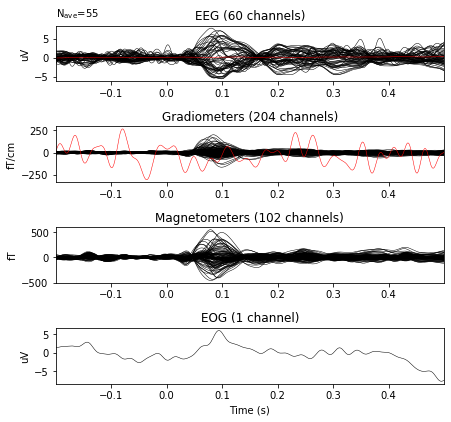

In [39]:
# 2）绘制evoked数据
# 将结果显示为蝶形图
# 可以通过使用exclude=[]，这里不排除不良通道，将不良通道以红色显示
# 	• 
# 	• 

evoked.plot(exclude=[], time_unit='s')

plt.show()

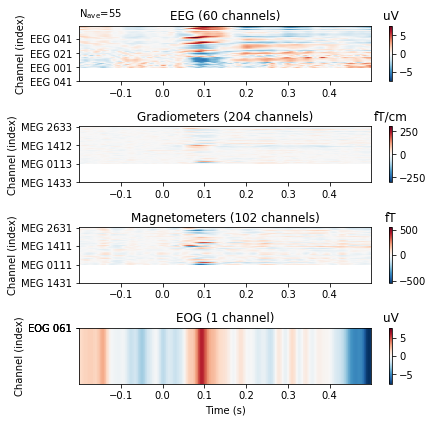

In [42]:
# 将结果以二维图片的形式显示 (x: time, y: channels, color: amplitude)
# 	• 
# 	• 

evoked.plot_image(exclude=[], time_unit='s')
plt.show()